<a href="https://www.kaggle.com/code/luchales/deep-finance?scriptVersionId=114015287" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
np.random.seed()

In [2]:
x=np.array([[0,1,0],
           [1,0,0],
           [1,1,1],
           [0,1,1]])

y=np.array([[0,1,1,0]]).T

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
w=2*np.random.random((3,1))-1
b=0

In [5]:
z=x.dot(w)+b

In [6]:
A=sigmoid(z)
print(A)

[[0.59701387]
 [0.68237361]
 [0.89440971]
 [0.79768632]]


In [7]:
#Perdida del modelo de medicion
def bce_loss(y,y_hat):
    N=y.shape[0]
    loss=-1/N*np.sum((y*np.log(y_hat))+(1-y)*np.log(1-y_hat))
    return loss

In [8]:
bce_loss(y,A)


0.7501395778968452

In [9]:
N=y.shape[0]
#Gradiantes
dz=(A-y)
dw=1/N*np.dot(x.T,dz)
db=1/N*np.sum(dz,axis=0,keepdims=True)

In [10]:
alpha=1
w -= alpha*dw
b -= alpha*db

In [11]:
epochs=20
loses=[]

In [12]:
for i in range(epochs):
    #Forward pass
    z=x.dot(w)+b
    A=sigmoid(z)
    
    #Calculate loss
    loss=bce_loss(y,A)
    print('Epoch:',i,'Loss:',loss)
    loses.append(loss)
    
    #Calculate derivates
    dz=(A-y)
    dw=1/N*np.dot(x.T,dz)
    db=1/N*np.sum(dz,axis=0,keepdims=True)
    
    #Parameter updates
    w -= alpha*dw
    b -= alpha*db
    

Epoch: 0 Loss: 0.574651934194903
Epoch: 1 Loss: 0.4824674298494094
Epoch: 2 Loss: 0.4276630198211431
Epoch: 3 Loss: 0.3880505992922296
Epoch: 4 Loss: 0.3560940303133032
Epoch: 5 Loss: 0.32913631423822004
Epoch: 6 Loss: 0.3059438344411355
Epoch: 7 Loss: 0.28575951448528203
Epoch: 8 Loss: 0.2680400996751214
Epoch: 9 Loss: 0.25236886781453005
Epoch: 10 Loss: 0.23841685355363745
Epoch: 11 Loss: 0.2259203737159171
Epoch: 12 Loss: 0.21466580850311262
Epoch: 13 Loss: 0.20447854157039475
Epoch: 14 Loss: 0.19521466942590915
Epoch: 15 Loss: 0.1867546877969964
Epoch: 16 Loss: 0.1789986334303684
Epoch: 17 Loss: 0.1718623140326553
Epoch: 18 Loss: 0.16527435979972777
Epoch: 19 Loss: 0.15917390021451833


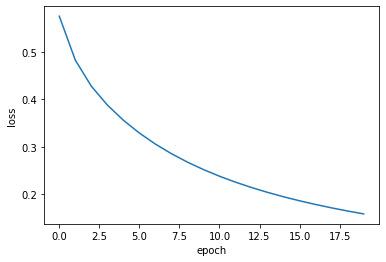

In [13]:
import matplotlib.pyplot as plt
plt.plot(loses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [14]:
#A deeper network
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [15]:
def forward_prop(model,a0):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = a0.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)
    cache = {'a0':a0,'z1':z1,'a1':a1,'z1':z1,'a2':a2}
    return cache


In [16]:
def tanh_derivative(x):
    return (1 - np.power(x, 2))

In [17]:
def bce_loss_derivative(y,y_hat):
    return (y_hat-y)

In [18]:
def backward_prop(model,cache,y):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    a0,a1, a2 = cache['a0'],cache['a1'],cache['a2']
    dz2 = bce_loss_derivative(y=y,y_hat=a2)
    dW2 = (a1.T).dot(dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)
    dz1 = dz2.dot(W2.T) * tanh_derivative(a1)
    dW1 = np.dot(a0.T, dz1)
    db1 = np.sum(dz1, axis=0)
    grads = {'dW2':dW2,'db2':db2,'dW1':dW1,'db1':db1}
    return grads

In [19]:
#Keras
from keras.layers import Dense, Activation
from keras.models import Sequential
#from tensorflow.keras.layers import Dense,Activation


In [20]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.15)


In [21]:
model=Sequential()
model.add(Dense(4,input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
activation (Activation)      (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 25
Trainable params: 25
Non-trainable params: 0
____________________________________________________________

2022-12-16 18:51:20.910818: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [22]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['acc'])

In [23]:
history = model.fit(X,y,epochs=1500)

2022-12-16 18:51:21.153822: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1500
7/7 [==============================] - 1s 2ms/step - loss: 0.7942 - acc: 0.2250
Epoch 2/1500
7/7 [==============================] - 0s 2ms/step - loss: 0.7788 - acc: 0.2600
Epoch 3/1500
7/7 [==============================] - 0s 2ms/step - loss: 0.7638 - acc: 0.3200
Epoch 4/1500
7/7 [==============================] - 0s 2ms/step - loss: 0.7506 - acc: 0.3650
Epoch 5/1500
7/7 [==============================] - 0s 2ms/step - loss: 0.7379 - acc: 0.4200
Epoch 6/1500
7/7 [==============================] - 0s 2ms/step - loss: 0.7249 - acc: 0.4550
Epoch 7/1500
7/7 [==============================] - 0s 2ms/step - loss: 0.7134 - acc: 0.5150
Epoch 8/1500
7/7 [==============================] - 0s 2ms/step - loss: 0.7017 - acc: 0.5450
Epoch 9/1500
7/7 [==============================] - 0s 2ms/step - loss: 0.6906 - acc: 0.5850
Epoch 10/1500
7/7 [==============================] - 0s 2ms/step - loss: 0.6800 - acc: 0.5850
Epoch 11/1500
7/7 [==============================] - 0s 2ms/step - lo

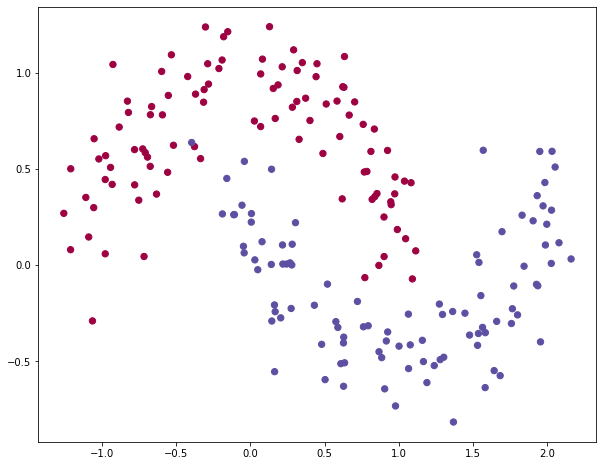

In [24]:
np.random.seed(0)
X, Y = sklearn.datasets.make_moons(200, noise=0.15)
Y = Y.reshape(200,1)
plt.scatter(X[:,0], X[:,1], s=40, c=y.flatten(), cmap=plt.cm.Spectral)

In [25]:
test_loss, test_acc = model.evaluate(X, y)
print('Test accuracy:', test_acc)

7/7 [==============================] - 0s 2ms/step - loss: 0.0590 - acc: 0.9900
Test accuracy: 0.9900000095367432


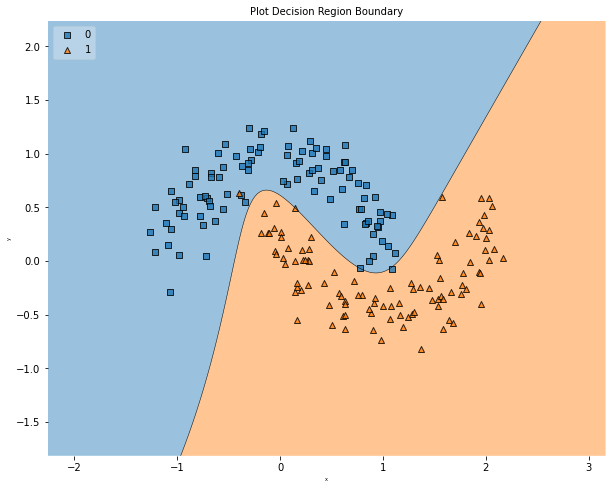

In [26]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel("x", size=5)
plt.ylabel("y", size=5)
plt.title('Plot Decision Region Boundary', size=10)
plt.show()